In [1]:
# Libraries:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Credentials for twitter api

In [91]:
# Import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

### Extract tweets 

In [109]:
# We create an extractor object:
extract_tweets = twitter_setup()

# We create a tweet list as follows:
#tweets = extract_tweets.user_timeline(screen_name="ap", count=200)
tweets = extract_tweets.search( q='Donald Trump', count=200 )
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)  
    print()

Number of tweets extracted: 100.

5 recent tweets:

RT @PalmerReport: Donald Trump runs smack into the rule of law https://t.co/l6d0yKBotu

RT @selectedwisdom: So surprised this is not a bigger story today, Mueller team filing says Gates knew he was in contact with a Russian age…

RT @WhiteHouse: President Trump sparks renewed focus on American infrastructure: https://t.co/759wELnAp7

RT @JanzforCongress: My opponent @DevinNunes and Donald Trump’s attacks on law enforcement are helping terrorists and criminals in courts o…

RT @markos: FANTASTIC piece: https://t.co/VuloSkMqfE



### Add tweets to a pandas dataframe and add relevant data to the dataframe

In [110]:
# Create a pandas dataframe:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,RT @PalmerReport: Donald Trump runs smack into...
1,RT @selectedwisdom: So surprised this is not a...
2,RT @WhiteHouse: President Trump sparks renewed...
3,RT @JanzforCongress: My opponent @DevinNunes a...
4,RT @markos: FANTASTIC piece: https://t.co/Vulo...
5,RT @804StreetMedia: @realDonaldTrump White Hou...
6,RT @Canadiangal51: Mueller: Trump campaign's G...
7,RT @business: Donald Trump intends to nominate...
8,RT @_FranklinWright: TRUMP WARNS: My Administr...
9,"RT @joncoopertweets: Donald Trump, and super P..."


In [94]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [111]:
# Print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

979111088879960064
2018-03-28 21:40:49
Twitter for Android
0
43
None
None
{'urls': [{'url': 'https://t.co/l6d0yKBotu', 'indices': [63, 86], 'display_url': 'palmerreport.com/analysis/rule-…', 'expanded_url': 'http://www.palmerreport.com/analysis/rule-law-donald-trump/9063/'}], 'symbols': [], 'user_mentions': [{'indices': [3, 16], 'id_str': '15115280', 'screen_name': 'PalmerReport', 'id': 15115280, 'name': 'Palmer Report'}], 'hashtags': []}


In [112]:
# Add the relevant data:
data['len']     = np.array([len(tweet.text) for tweet in tweets])
data['ID']      = np.array([tweet.id for tweet in tweets])
data['Date']    = np.array([tweet.created_at for tweet in tweets])
data['Source']  = np.array([tweet.source for tweet in tweets])
data['Likes']   = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']     = np.array([tweet.retweet_count for tweet in tweets])

In [113]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @PalmerReport: Donald Trump runs smack into...,86,979111088879960064,2018-03-28 21:40:49,Twitter for Android,0,43
1,RT @selectedwisdom: So surprised this is not a...,140,979111087302832129,2018-03-28 21:40:48,Twitter for Android,0,1279
2,RT @WhiteHouse: President Trump sparks renewed...,104,979111083247128577,2018-03-28 21:40:47,Twitter for iPhone,0,346
3,RT @JanzforCongress: My opponent @DevinNunes a...,140,979111083028959232,2018-03-28 21:40:47,Twitter for iPhone,0,44
4,RT @markos: FANTASTIC piece: https://t.co/Vulo...,52,979111082987057153,2018-03-28 21:40:47,Twitter Web Client,0,19
5,RT @804StreetMedia: @realDonaldTrump White Hou...,140,979111082567577600,2018-03-28 21:40:47,Twitter for Android,0,26
6,RT @Canadiangal51: Mueller: Trump campaign's G...,125,979111082357764096,2018-03-28 21:40:47,Twitter for Android,0,2
7,RT @business: Donald Trump intends to nominate...,140,979111080449445888,2018-03-28 21:40:47,Twitter Web Client,0,4
8,RT @_FranklinWright: TRUMP WARNS: My Administr...,140,979111072862031872,2018-03-28 21:40:45,Twitter Web Client,0,43
9,"RT @joncoopertweets: Donald Trump, and super P...",140,979111072530599936,2018-03-28 21:40:45,Twitter for Android,0,286


### Averages, most liked, retweeted tweets, time series with respect to length of the tweets, likes, retweets

In [114]:
# Extract the mean length of the tweets:
mean = np.mean(data['len'])

print("The average length of tweets: {}".format(mean))

The average length of tweets: 131.9


In [115]:
# Extract the tweet with more FAVs and more RTs:
# Since more than one could have the same number of likes/retweets (the maximum) 
# Need to take the first one found, 
# use .index[0] to assign the index to the variables fav and rt. 

print("Correlation bewtween likes and retweets is: {}".format(data['RTs'].corr(data['Likes'])))

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

Correlation bewtween likes and retweets is: -0.05171836897119965
The tweet with more likes is: 
"This administration is running like a fine-tuned machine." - Donald Trump
❌Shulkin
❌McMaster
❌McEntee  
❌Tillerson… https://t.co/Kh1exlsC0q
Number of likes: 4
140 characters.

The tweet with more retweets is: 
RT @krassenstein: Donald Trump won the White Evangelical Christian vote by a margin of 64 points, 80%-16%

It's shameful these people demon…
Number of retweets: 7903
140 characters.



In [116]:
# Create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

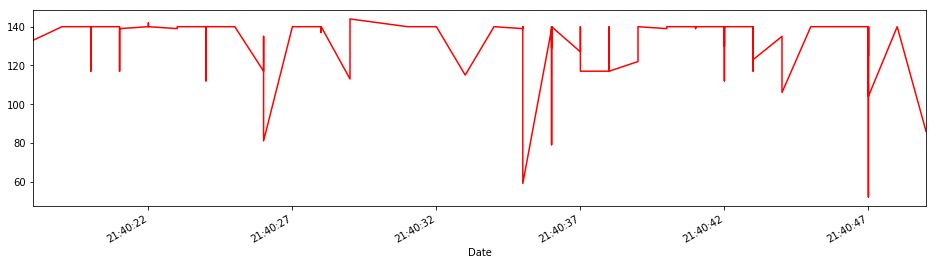

In [117]:
# Lengths along time:
tlen.plot(figsize=(16,4), color='r');

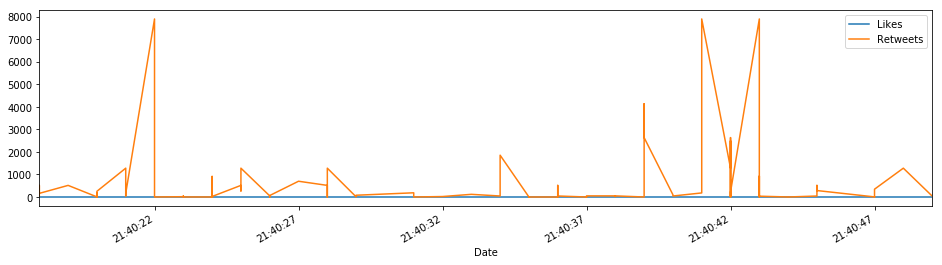

In [118]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

### Analyze the different sources used to tweet and display using pie-chart

In [119]:
#Obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter for iPhone
* Twitter Web Client
* IFTTT
* FintechIndia
* Twitter for iPad
* Tweet Old Post
* Twitter for Windows
* Google
* Twitter Lite
* TweetDeck
* Fenix 2
* cbc_diff
* Botize
* Convey: Make it post for you
* DonaldTrumpTruthFeed


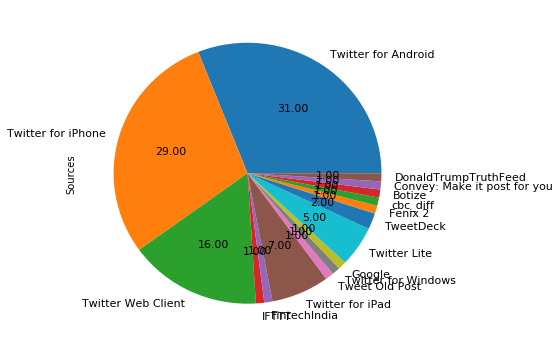

In [120]:
# Create a pie chart of sources:
sources = data['Source'].unique()
percent = data['Source'].value_counts()

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

### Sentiment Analysis of the tweets

In [121]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [122]:
# Create a column with the result of the analysis:
data['SA'] = np.array([ analyze_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

# save to a csv file 
# data.to_csv('tweets_data.csv', index=False, encoding='utf-8')   

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @PalmerReport: Donald Trump runs smack into...,86,979111088879960064,2018-03-28 21:40:49,Twitter for Android,0,43,0
1,RT @selectedwisdom: So surprised this is not a...,140,979111087302832129,2018-03-28 21:40:48,Twitter for Android,0,1279,1
2,RT @WhiteHouse: President Trump sparks renewed...,104,979111083247128577,2018-03-28 21:40:47,Twitter for iPhone,0,346,0
3,RT @JanzforCongress: My opponent @DevinNunes a...,140,979111083028959232,2018-03-28 21:40:47,Twitter for iPhone,0,44,0
4,RT @markos: FANTASTIC piece: https://t.co/Vulo...,52,979111082987057153,2018-03-28 21:40:47,Twitter Web Client,0,19,1
5,RT @804StreetMedia: @realDonaldTrump White Hou...,140,979111082567577600,2018-03-28 21:40:47,Twitter for Android,0,26,0
6,RT @Canadiangal51: Mueller: Trump campaign's G...,125,979111082357764096,2018-03-28 21:40:47,Twitter for Android,0,2,0
7,RT @business: Donald Trump intends to nominate...,140,979111080449445888,2018-03-28 21:40:47,Twitter Web Client,0,4,0
8,RT @_FranklinWright: TRUMP WARNS: My Administr...,140,979111072862031872,2018-03-28 21:40:45,Twitter Web Client,0,43,1
9,"RT @joncoopertweets: Donald Trump, and super P...",140,979111072530599936,2018-03-28 21:40:45,Twitter for Android,0,286,1


In [123]:
# Construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [125]:
# Print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 37.0%
Percentage of neutral tweets: 56.0%
Percentage of negative tweets: 7.0%
